In [2]:
#Load pickle

import pickle
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [3]:
with open('TheoryEx3kindata.pickle', 'rb') as f:
    data = pickle.load(f)

c_0 = 4.05
tdata = data['tdata']
kindata = data['kindata']

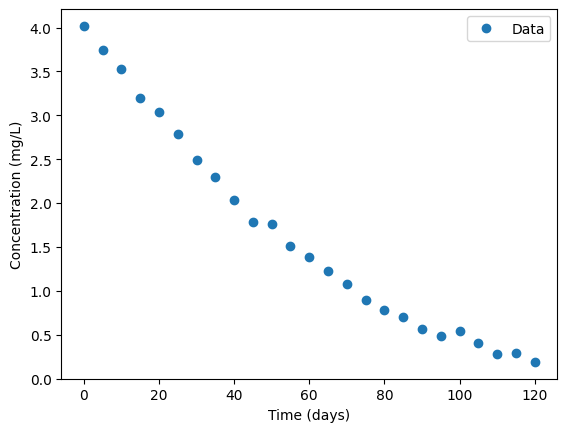

In [4]:
plt.plot(tdata, kindata, 'o', label='Data')
plt.xlabel('Time (days)')
plt.ylabel('Concentration (mg/L)')
plt.legend()


In [5]:
def model(t, c, k):
    dcdt = -k * c
    return dcdt
    
def fit_func(t, c_0, k):
    sol = solve_ivp(lambda t,c: model(t,c,k), t_span=(t[0], t[-1]), y0=[c_0], t_eval=t )
    return sol.y[0]

def fit_model(time, conc, c_0, k_guess):
    popt, pcov = curve_fit(lambda t,k : fit_func(t, c_0, k), time, conc, p0=[k_guess], )
    return popt, pcov

k = 0.1

popt, pcov = fit_model(tdata, kindata, c_0, k)
print(f"popt = {popt}")

lsqe = np.sqrt(np.sum((kindata - fit_func(tdata, c_0, popt[0]))**2))
print(f"lsqe = {lsqe}")


popt = [0.01868272]
lsqe = 0.777461565289254


In [8]:
def model_2(t, c, k, n):
    dcdt = -k * c**n
    return dcdt

def fit_func(t, c_0, k, n):
    sol = solve_ivp(lambda t,c: model_2(t,c,k, n), t_span=(t[0], t[-1]), y0=[c_0], t_eval=t )
    return sol.y[0]

def fit_model(time, conc, c_0, k_guess, n):
    popt, pcov = curve_fit(lambda t,k,n : fit_func(t, c_0, k, n), time, conc, p0=[k_guess, n], )
    return popt, pcov

n = 1
popt, pcov = fit_model(tdata, kindata, c_0, k, n)
print(f"popt = {popt}")

lsqe = np.sqrt(np.sum((kindata - fit_func(tdata, c_0, popt[0], popt[1]))**2))
print(f"lsqe = {lsqe}")


popt = [0.02580173 0.59713964]
lsqe = 0.22613435798806367


C:\Users\olofs\AppData\Local\Temp\ipykernel_41524\1635459340.py:2: RuntimeWarning: invalid value encountered in power
  dcdt = -k * c**n


In [11]:
def model_3(t, c, k1, k2):
    dcdt = -k1*c(k2+c)
    return dcdt
    
def fit_func(t, c_0, k1, k2):
    sol = solve_ivp(lambda t,c: model_3(t,c,k1,k2), t_span=(t[0], t[-1]), y0=[c_0], t_eval=t )
    return sol.y[0]

def fit_model(time, conc, c_0, k_guess1, k_guess2):
    popt, pcov = curve_fit(lambda t,k1,k2 : fit_func(t, c_0, k1,k2), time, conc, p0=[k_guess1, k_guess2], )
    return popt, pcov

k1, k2 = 0.1, 0.1
popt, pcov = fit_model(tdata, kindata, c_0, k1, k2)
print(f"popt = {popt}")

lsqe = np.sqrt(np.sum((kindata - fit_func(tdata, c_0, popt[0], popt[1]))**2))
print(f"lsqe = {lsqe}")

TypeError: 'numpy.ndarray' object is not callable